# Heisenberg Model Examples

## Spin Interactions
We start by exploring a few basic interactions between spins.


### Exchange

Exchange interaction is the most common spin-spin interaction. In Heisenberg model, the Hamiltonian can be written as:

$$H_{exc}=-\sum_{i,j}J_{ij}\vec{S_i}\cdot\vec{S_j}$$ 



Note: There are several different conventions in the form of the Hamiltonian. e.g.
$$H_{exc}=-\sum_{<i,j>}J_{ij}\vec{S_i}\cdot\vec{S_j}$$ 
    ($i<j$ so that each i-j pair are counted only once. )
    
$$H_{exc}=\sum_{<i,j>}J_{ij}\vec{S_i}\cdot\vec{S_j}$$
    (No negative sign)
    
Here we use the first convention. The ground state requires the total energy to be minimum. Therefore, two spins $\vec{S_i}$ and $\vec{S_j}$ align parallel or antiparallel to minimize the energy.
    
#### Exercise: Ferromagnetic (FM) & AntiFerromagnetic (AFM) exchange

Try to tune the sign of J1 to get FM and AFM spin configuration. 

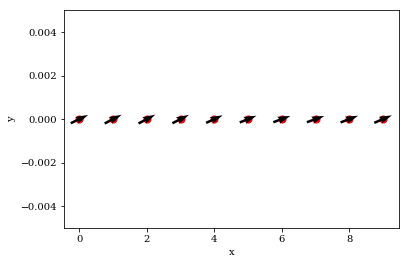

In [1]:
%matplotlib inline
from example import *
ham=exchange_1d_hamiltonian(J1=1*meV,  # first neighbor exchange.
                            #J2=0,
                            #k1=np.array([-0 * mu_B]),
                            #k1dir=np.array([[0.0, 0.0, 1.0]]),
                            )
plot_supercell(ham, supercell_matrix=np.diag([10, 1,1]), plot_type='2d',length=10, ylimit=[-0.005, 0.005])

### Uniaxial Single Ion Anisotropy
In a material, there are prefered (non-prefered) orientations of the spins, which is called the easy(hard) axis. The simplest form of it is the uniaxial single ion anisotropy. It is:
 - uniaxial because it has only one easy or hard axis
 - single ion because for each spin there is one axis
 
The form of the Hamiltonian can be written as:
$$H_{uni}=-K_u \sum_i (\vec{S_i}\cdot \vec{e})^2$$
where $\vec{e}$ is vector of easy/hard axis, $K_u$ is the strength of the uniaxial single ion anistropy.

#### Exercise:  easy axis & hard axis
Try to tune the sign of k1 ($K_u$)and the orientation of k1dir ($\vec{e}$) and answer the following questions:
  *  what is the physical meaning of $k1>0$ and $k1<0$ 
  *  are $\vec{e}$ and $-\vec{e}$ different?

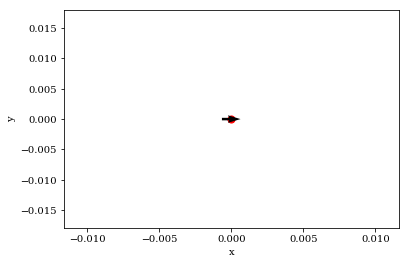

In [2]:
%matplotlib inline
from example import *
ham=exchange_1d_hamiltonian(J1=0, 
                            J2=0,
                            k1=np.array([1*meV]),  # amplitude of single ion anistropy
                            k1dir=np.array([[1.0, 0.0, 0.0]]), # direction of single ion anistropy
                            )
plot_supercell(ham, supercell_matrix=np.diag([1, 1,1]), plot_type='2d')

### Dzyaloshinskii-Moriya Interaction (DMI): 
For two magnetic ion A connected by another ion B, there is a kind of interaction preferring the spins to be perpendicular to each other.  
![DMI.png](DMI.jpg)

DMI is also called antisymmetric because $\vec{D_{ij}}=-\vec{D_{ji}}$. It has the property of pseudovector $\vec{D_{ij}}\propto \vec{r_{ij}}\times\vec{x}$. 

The Hamiltonian can be written as:
$$ H_{DM} = \sum_{i\neq j} \vec{D}_{ij}\cdot \vec{S_i}\times{\vec{S_j}}$$

#### Exercise: 
   - In the picture above, what is the direction of $\vec{D_{ij}}$
   - Guess from the Hamiltonian if the spins are aligned right handed or left handed when D (DMI in the code below) is positive or negative. 
   - Tune the sign of DMI to see if you are right.
   

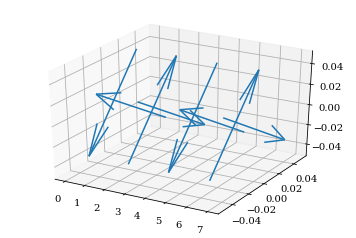

In [1]:
%matplotlib inline
from example import *
ham=exchange_1d_hamiltonian(J1=0, 
                            J2=0,
                            DMI=[200*meV,0*meV,0*meV], # DMI interaction vector. 
                            k1=np.array([1*meV]),
                            k1dir=np.array([[1.0, 0.0, 0.0]]),
                            )
plot_supercell(ham, supercell_matrix=np.diag([8, 1,1]), plot_type='3d')

## Ordering of spin

Now we know the three main spin interactions in crystal. Let's try to see what happens when they are taken all together.

### 1D spin chain with first & second neighbor exchange

#### A simple introduction spin band structure in k-space.
   - the periodic alignment of spin can be described with a k-vector, so that $\vec{k}\cdot\vec{\lambda}=2\pi$.
       *e.g.* in a AFM state of a 1D lattice with lattice parameter $a$, $\lambda=2a$, $k=2\pi/2a$. Usually , we use $2\pi/a$ as the unit of reciprocal space, therefore k=1/2. For FM, we have k=0 ($\Gamma$).
   - We can plot the energy of the $S(\vec{r})=S(0)\cdot e^{i\vec{k}\cdot\vec{r}}$ in the Energy versus $k$ figure, where the ground state corresponds to the point having the lowest energy.

#### Exercise:
* In the 1D spin chain with FM (or AFM) first nearest neighbor (J1), what is the lowest energy q-point? 
* With both FM and AFM J1, the second nearest neighbor are parrallel, what happens if the second nearest neighbor J2 is AFM?
* Tune the values of J1 and J2 and see how the ground state $k$-vector changes.

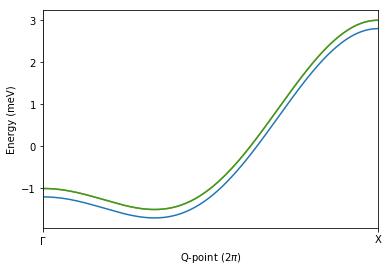

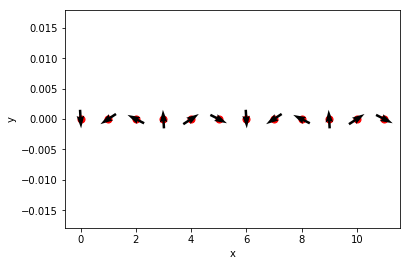

In [12]:
%matplotlib inline
from example import *
ham=exchange_1d_hamiltonian(J1=10*meV,    # first neighbor exchange
                            J2=-5*meV,  # second neighbor exchange
                            k1=np.array([-1*meV]),  # single ion anistopy. used here so the spins are inplane (so we can see them.)
                            k1dir=np.array([[0.0, 0.0, 1.0]]),
                            )
plot_spinwave(ham,
              qnames=[ '$\Gamma$', 'X'],
              qvectors=[(0,0,0),
                        (0.5,0,0),
                       ])

plot_supercell(ham, 
               supercell_matrix=np.diag([12, 1,1]),
               plot_type='2d', length=0.01
              )

### 2D Spin square lattice
Now we can go one step further: a 2D square lattice. 
#### Exercise:
* Change Jx and Jy to get different spin ordering. What are their ground state wave vectors?

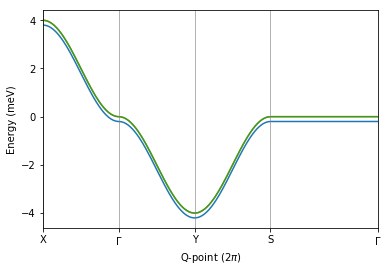

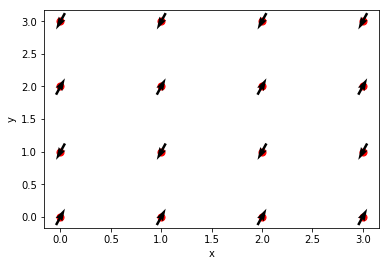

In [5]:
%matplotlib inline
from example import *
ham=square_2d_hamiltonian(Jx=10*meV, # exchange along x
                              Jy=-10*meV, # exchange along y.
                              k1=np.array([-1 * meV]),
                              k1dir=np.array([[0.0, 0.0, 1.0]]))
plot_spinwave(ham,
              qnames=['X', '$\Gamma$', 'Y', 'S','$\Gamma$'],
              qvectors=[(0.5,0,0), # 'X'
                        (0,0,0),   # 'Gamma'
                        (0,0.5,0), # 'Y'
                        (0.5,0.5,0), # 'S'
                        (0,0,0)])   # 'Gamma'
plot_supercell(ham, 
               supercell_matrix=np.diag([4, 4,1]),
               plot_type='2d')

### 2D triangular lattice (Frustration 2)
In a regular situation, two spins would be quite happy to be parallel or antiparallel. What happens when the crystal structure doesn't allow them to be that happy? Here's an example.

In a triangle structure with all first neighbor interactions antiferromagnetic, two spins want to be antiparallel, but what about the third one?
![triangular](triangle.png)

#### Exercise:
   - Find out what the ground state of 2D AFM triangular lattice is?
   - Play with the size of the supercell (by changing the supercelll_matrix), and see how the magnetic configuration changes.

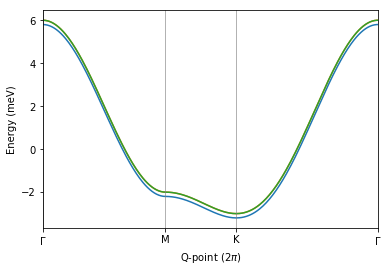

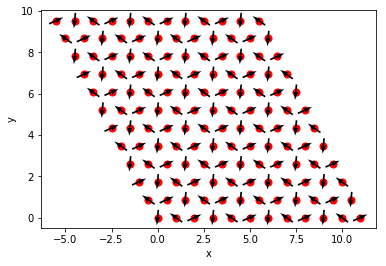

In [6]:
%matplotlib inline
from example import *
ham=traingular_2d_hamiltonian(J1=-10*meV,
                              k1=np.array([-1*meV]),
                              k1dir=np.array([[0.0, 0.0, 1.0]]))
plot_spinwave(ham, 
              qnames=[ '$\Gamma$', 'M', 'K','$\Gamma$'],
              qvectors=[
                        (0,0,0),
                        (0.5,0,0),
                        (1.0/3,1.0/3,0),
                        (0,0,0)
                       ]) 
plot_supercell(ham, 
               supercell_matrix=np.diag([12, 12,1]),
               plot_type='2d')

### 3D cubic lattice (FM, A-type, C-type, G-type, etc...)
Now let's check the usual spin configurations in 3D cubic structure.

![cubic](cubic.png)

#### Exercise:
 - Tune Jx, Jy and Jz to get the FM, A, C, G type spin configuration.
 - What are their wave vectors?

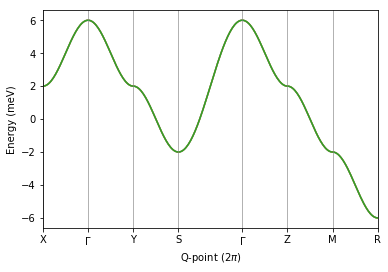

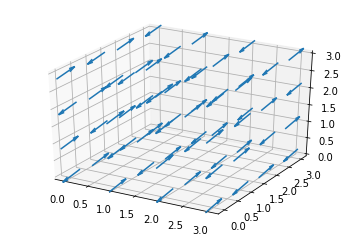

In [7]:
%matplotlib inline
from example import *
ham=cubic_3d_hamiltonian(Jx=-10*meV,
                         Jy=-10*meV,
                         Jz=-10*meV,
                         #DMI=[0, 0, 0e-21],
                         #k1=np.array([-0 * mu_B]),
                         #k1dir=np.array([[0.0, 0, 1.0]])
                        )
plot_spinwave(ham,
              qnames=['X', '$\Gamma$', 'Y', 'S','$\Gamma$','Z','M','R'],
              qvectors=[(0.5,0,0), # X
                        (0,0,0), # Gamma
                        (0,0.5,0), # Y
                        (0.5,0.5,0), # S
                        (0,0,0), # Gamma
                        (0,0,0.5), # Z
                        (0,0.5,0.5), # M
                        (0.5,0.5,0.5) # R
                       ])
plot_supercell(ham, 
               supercell_matrix=np.diag([4, 4,4]),
               plot_type='3d', length=0.6)

### 1D AFM spin chain with DMI. (spin canting)

In a structure with exchange and DMI, the exchange interaction wants the spins to be parallel or antiparallel, whereas the DMI wants the spin to be perpendicular to each nearest neighbor. What is the result of their battle? (Note DMI is oftern much weaker).

In the following exercise we build the 1D chain with both exchange and DMI together.
The DMI1 and DMI2 are two consecutive DMI interactions, as shown in the picture below.

![canting_DMI](canting_DMI.png)
#### Exercise:
- Set DMI to 0 to get AFM magnetic order.
- Set J1 to zero. Then change sign of DMI1 and DMI2 to see how the spin configuration changes.
- Turn on both J and DMI. Tune the signs of J and DMI1, DMI2 to see when does spin canting happen.
- Change the value of DMI to tune the canting angle.
 

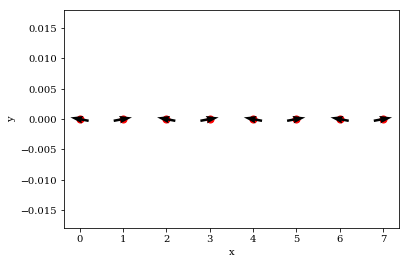

In [2]:
%matplotlib inline
from example import *
ham=canting_1d_hamiltonian(J1=-5*meV,
                            #J2=0e-21,
                            DMI1=[0e-21,0, 2*meV],
                            DMI2=[-0e-21,0, -2*meV],
                            k1=np.array([0.2*meV]),
                            k1dir=np.array([[1.0, 0.0, 0.0]]),
                            plot_type='2d')
ham.write_xml('canting.xml')
plot_supercell(ham, 
               supercell_matrix=np.diag([4, 1,1]),
               plot_type='2d', length=0.1)

## Critical Temperature
In the above examples, we assumed the temperature is 0K. As the temperature increases, the spins will be excited from their ground state (thermal fluctuations). At a critical temperature there will be a phase transition when the thermal fluctuation is larger than the magnetic interactions.  

### Tc of 1D ferromagnetic structure
Here we analyze what happens when the temperature is above 0K in the 1D FM chain case.


T: 0.0   M: 0.999998927109
T: 20.0   M: 0.149002059236
T: 40.0   M: 0.0684981589026
T: 60.0   M: 0.084901218693
T: 80.0   M: 0.096379889936


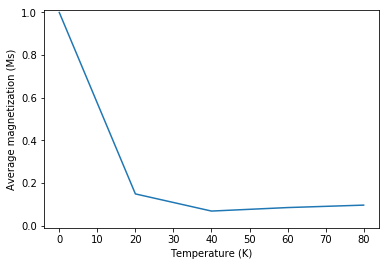

In [9]:
%matplotlib inline
from example import *
ham=exchange_1d_hamiltonian(J1=30*meV, 
                            #J2=-0.5e-21,
                            #k1=np.array([0 * mu_B]),
                            k1dir=np.array([[0.0, 0.0, 1.0]]),
                            )
plot_M_vs_T(ham, 
            supercell_matrix=np.diag([1,1,100]),
            Tlist=np.arange(0.0,100,20))

### Tc of 3D cubic lattice
In three dimension, it is a different story. 
Let's heat up the FM 3D cubic lattice to see what happens. The figure below shows how the average magnetic moment evolve with time. The initial state is the FM state. 
#### Exercise:
* Tune the temperature to 0K , 600K , 1000K to see what happens.

    

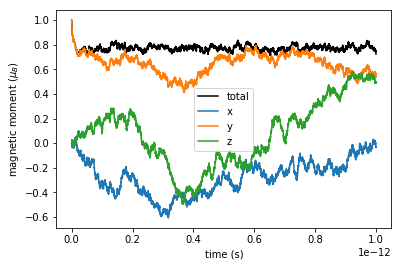

In [10]:
%matplotlib inline
from example import *
ham=cubic_3d_hamiltonian(Jx=30*meV,
                         Jy=30*meV,
                         Jz=30*meV,
                         #DMI=[0, 0, 0.5e-21],
                         #k1=np.array([-0 * mu_B]),
                         #k1dir=np.array([[0.0, 0, 1.0]])
                        )
plot_M_vs_time(ham, 
            supercell_matrix=np.diag([6,6,6]), # size of supercell
            temperature=300)

#### Exercise
The figure below shows the average magnetic moment versus temperature. 
* Tune the size of the supercell (do not use a too large supercell, otherwise the caluclation will take too long.)

T: 0.0   M: 0.999998927109
T: 100.0   M: 0.933685184187
T: 200.0   M: 0.860508143817
T: 300.0   M: 0.768591772987
T: 400.0   M: 0.662639599085
T: 500.0   M: 0.482780806873
T: 600.0   M: 0.262557066123
T: 700.0   M: 0.16604308633
T: 800.0   M: 0.125668123142
T: 900.0   M: 0.114995192841
T: 1000.0   M: 0.104417042847


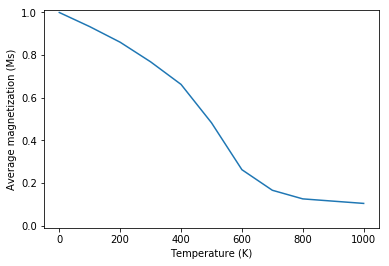

In [11]:
%matplotlib inline
from example import *
ham=cubic_3d_hamiltonian(Jx=30*meV,
                         Jy=30*meV,
                         Jz=30*meV,
                         #DMI=[0, 0, 0.5e-21],
                         #k1=np.array([-0 * mu_B]),
                         #k1dir=np.array([[0.0, 0, 1.0]])
                        )
plot_M_vs_T(ham, 
            supercell_matrix=np.diag([6,6,6]), # size of the supercell, maximum [6,6,6].
            Tlist=np.arange(0.0,1100,100))     # range of temperature.